In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

lighting = 'soft'
#file = 'bearing_' + lighting +'.jpg'
filename = 'bearing_soft.jpg'

(512, 512) float32


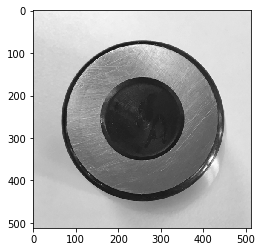

In [2]:
img = Image.open(filename).convert('L')
img.thumbnail((512,512))
img_array = np.array(img, dtype='f')
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
print(img_array.shape, img_array.dtype) # rows, column, color channels

1120061.0


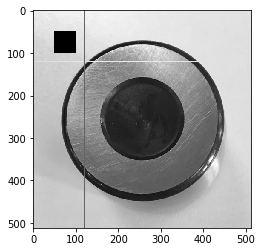

In [3]:
i, j = 120, 60

img_array[i,:] = img_array[j,:] # set the values of row i with values from row j
img_array[:,i] = 100 # set all values in column i to 100
sum = img_array[:100,:50].sum() # the sum of the values of the first 100 rows and 50 columns
img_array[50:100,50:100] = 0 # rows 50-100, columns 50-100 (100th not included)
img_array[i].mean() # average of row i
img_array[:,-1] # last column
img_array[-2,:] # second to last row

print(sum)
plt.imshow(img_array, cmap='gray')

## Graylevel Transformations

In [4]:
def linear_trans(img_array):
    return img_array

def inverse_trans(img_array):
    return 255 - img_array

def clamping_trans(img_array):
    # clamp to interval [100,200]
    return (100/255) * img_array + 100

def power_trans(img_array, pow):
    return 255.0 * (img_array/255.0)**pow

space = np.linspace(0, 255, 255)

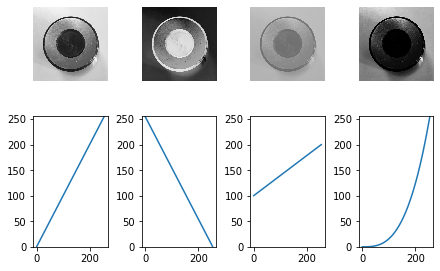

In [5]:
fig, ax = plt.subplots(2,4, constrained_layout=True)
img_array = np.array(img)

# pictues
ax[0, 0].imshow(linear_trans(img_array), cmap='gray', vmin=0, vmax=255)
ax[0, 1].imshow(inverse_trans(img_array), cmap='gray', vmin=0, vmax=255)
ax[0, 2].imshow(clamping_trans(img_array), cmap='gray', vmin=0, vmax=255)
ax[0, 3].imshow(power_trans(img_array, 3), cmap='gray', vmin=0, vmax=255)

for i in range(4):
    ax[0, i].axis('off')

# transformations
ax[1, 0].plot(linear_trans(space))
ax[1, 0].set_ylim([0,255])
ax[1, 1].plot(inverse_trans(space))
ax[1, 1].set_ylim([0,255])
ax[1, 2].plot(clamping_trans(space))
ax[1, 2].set_ylim([0,255])
ax[1, 3].plot(power_trans(space, 3))
ax[1, 3].set_ylim([0,255])


fig.savefig('graylevel_transform.jpg', dpi=300)

## Seperating RGB-Channels

In [8]:
type(img_array)
#chr_r, ch_g, ch_b = img_array.split()

numpy.ndarray